In [2]:

# CRM 분석이란 무엇인가?

# CRM 분석은 귀사의 판매 및 고객 서비스 성과를 입증하는 데이터입니다. 또한 CRM 분석은 보다 현명한 비즈니스 의사 결정을 알리는 데 사용할 수 있는 고객 데이터를 제공합니다. 일반적으로 CRM 소프트웨어를 사용하여 CRM 분석을 얻고 모든 데이터 수집 및 보고서 생성을 자동화합니다.

# CRM 분석의 이점

# CRM 분석의 주요 이점은 이를 사용하여 영업, 고객 서비스 및 마케팅 프로세스를 알릴 수 있다는 것입니다. CRM 분석을 사용하여 다음을 통해 방법을 개선할 수 있습니다.

# 고객 서비스 평가. CRM 분석은 고객 서비스 팀의 성과를 알려줍니다. 팀이 개선할 수 있는 수치를 발견하면, 이러한 목표를 향해 팀을 추진하는 관행을 구현하십시오.
# 정확한 고객 데이터. 고객 데이터를 인구 통계 마케팅 또는 전자 메일 마케팅에 사용하든, 적합한 사람에게 연락하고 있는지 알아야 합니다. CRM 분석은 당신이 그것을 하고 있다는 것을 보장한다.
# 철저한 고객 분석. 당신의 고객은 보통 한 분기당 얼마를 소비합니까? 같은 제품을 몇 번이고 사는 건가요, 아니면 다른 건가요? CRM 분석을 통해 이러한 질문에 대한 확실한 답을 얻을 수 있으며, 배운 내용을 사용하여 마케팅 전략을 개선할 수 있습니다.
# 효율적인 리드 생성. 당신의 CRM 분석은 당신의 마케팅 노력 중 어떤 것이 구매와 가장 강하게 관련이 있는지 알려줄 수 있다. 구매와 밀접한 관련이 있는 한 가지 접근 방식이 있지만 이러한 접근 방식을 통해 일부 고객만을 대상으로 했다면, 이 방법을 더 시도해 보십시오. 즉, 매출이 증가할 수 있습니다.
# 데이터 셋 설명 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [3]:
import os
import datetime
import squarify
import warnings
import pandas as pd 
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
palette = 'Set2'

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기 : 
crm_dataset = pd.read_csv('/Users/hyeonchanglee/Documents/data_analyst/004마케팅_퍼널/CRM_dataset/CRM_dataset.csv', \
    encoding = 'unicode_escape',dtype = {'CustomerID': str,'InvoiceID': str},)

# 문자에서 날짜형으로 변경
crm_dataset['InvoiceDate'] = pd.to_datetime(crm_dataset['InvoiceDate'])
# crm_dataset['InvoiceNo'].astype(str)
# crm_dataset['CustomerID'].astype(str)

df = crm_dataset.copy()


In [5]:
#1. Libraries and Utilities, Load and Check Data, Understanding Data

# 일반적으로 전자 상거래 데이터 세트는 독점적이며 결과적으로 공개적으로 사용 가능한 데이터 중에서 찾기 어렵다. 
# 그러나 UCI 기계 학습 저장소는 2010년과 2011년의 실제 트랜잭션을 포함하는 이 데이터 세트를 만들었다. 
# 데이터 세트는 "온라인 소매"라는 제목으로 찾을 수 있는 사이트에서 유지된다.

# 📃 변수 설명

# 송장번호 : 6자리로 구성된 송장번호입니다. 이 코드가 문자 'c'로 시작하면 취소를 나타냅니다.
# 재고코드 : 5자리로 구성된 상품코드입니다.
# 설명: 상품명.
# 수량: 트랜잭션당 각 제품의 수량입니다.
# 송장 날짜: 각 트랜잭션이 생성된 날짜와 시간을 나타냅니다.
# 단가: 개당 제품 가격.
# 고객.ID : 5자리 고객번호입니다. 고객마다 고유한 고객 ID가 있습니다.
# 국가: 각 고객이 거주하는 국가 이름

In [6]:
# <1. 데이터 셋 확인>
print(df.head()) # 상위 5
print('- - '*50)
print(df.tail()) # 하위 5
print('- - '*50)
print('null의 개수 :\n',df.isna().sum()) # null 확인
print('- - '*50)
print('중복 된 개수 :',df.duplicated().sum()) # 중복값 확인

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [7]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

# import plotly.graph_objs as go 

In [8]:
# import plotly.graph_objs as go
# from plotly.offline import iplot

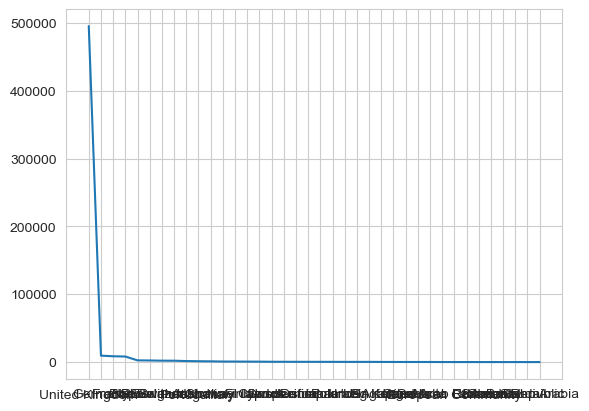

In [9]:
plt.plot(df['Country'].value_counts())

In [10]:
countries_a = df['Country'].value_counts()
countries_a.iplot(kind='bar')

# segments = rfm['segment'].value_counts().sort_values(ascending = False)
# segments.iplot(kind='bar')


In [11]:

# <2. 세계 지도로 분포 확인>
# 고객아이디, 송장번호, 국가순으로 그룹, reset_index를 통해 인덱스를 없앰
world_map = df[['CustomerID','InvoiceNo','Country']].groupby(['CustomerID','InvoiceNo','Country']).count().reset_index(drop=False)
countries = world_map['Country'].value_counts() # 국가 컬럼의 값 개수를 셈
# print(world_map)
# print(contries)

data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

# Descriptive Statistics
# 서술적 통계

In [12]:
print(df[['Quantity','UnitPrice']].describe())


            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


# Data Preprocessing

In [13]:
# df_ = df.copy()
# df_ = df_.dropna() # null값 제거

# #취소주문
# # ~ 는 ~가 아닌것의 not과 동일
# print(df_[~df_['InvoiceNo'].str.contains('C',na=False)]) # InvoiceNo에 C가 포함되지 않은 데이터를 출력

# print(df_[df_['InvoiceNo'].str.contains('C',na=False)])
# a = df_[df_['InvoiceNo'].str.contains('C',na=False)]

# print(df_[df_['Quantity'] > 0])
# b = df_[df_['Quantity'] < 0]

# # 수량이 0보다 작은 것(=취소건)과 송장번호가 C로 시작하는 것(=취소건)이 동일한지 화인
# a.equals(b) # True


In [14]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    df_ = dataframe.copy() # 입력받은 데이터 프레임의 카피를 만듬
    quartile1 = df_[variable].quantile(q1) # 데이터 프레임의 variable 컬럼의 0.25값을 저장
    quartile3 = df_[variable].quantile(q3) # 데이터 프레임의 variable 컬럼의 0.75값을 저장
    iqr = quartile3 - quartile1 # 0.5값 가운데 값을 도출함

    up_limit = quartile3 + 1.5 * iqr # 0.75 와 1.5곱하기 0.5값을 더함
    low_limit = quartile1 - 1.5 * iqr  # 0.25 와 1.5곱하기 0.5값을 더함
    df_.loc[(df_[variable] < low_limit), variable] = low_limit # 최저값으로 설정한 수준보다 낮아지면 설정 최저값으로 통일  
    df_.loc[(df_[variable] > up_limit), variable] = up_limit # 최고값으로 설정한 수준보다 높아지면 설정 최고값으로 통일

    return df_


def ecommerce_preprocess(dataframe):
    df_ = dataframe.copy() # dataframe의 복사본을 만듬

    df_ = df_.dropna() #null값 제거
    
    #Nan값이 존재하는 경우 False로 치환, 즉 Nan은 C가 포함된 송장넘버라고 고려하지 않음
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na=False)] # 취소건 삭제
    df_ = df_[df_['Quantity']>0] # 수량이 0보다 큰 값만 저장
    
    df_ = replace_with_thresholds(df_, 'Quantity', q1=0.01, q3=0.99) # 상위 1% 하위 1%는 잘라냄 Thresholds 임계점, 한계값
    df_ = replace_with_thresholds(df_, 'UnitPrice', q1=0.01, q3=0.99) # 상위 1% 하위 1%는 잘라냄

    df_['TotalPrice'] = df_['Quantity'] * df_['UnitPrice']

    return df_




In [15]:
df = ecommerce_preprocess(df)

In [16]:
print(df[['Quantity','UnitPrice','TotalPrice']].describe())


            Quantity      UnitPrice     TotalPrice
count  397924.000000  397924.000000  397924.000000
mean       11.833736       2.893163      20.627751
std        25.534512       3.227059      51.826400
min         1.000000       0.000000       0.000000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max       298.500000      37.060000    3268.575000


In [17]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPric

# RFM Analysis

RFM은 Recency, Frequency 및 Money value를 나타내며, 각각은 몇 가지 주요 고객 특성에 해당합니다. 이러한 RFM 측정 기준은 빈도와 금전적 가치가 고객의 평생 가치에 영향을 미치고, 근래에는 참여의 척도인 유지에 영향을 미치기 때문에 고객의 행동을 나타내는 중요한 지표입니다.

RFM 요인은 다음과 같은 사실을 보여줍니다.

최근 구매일수록 고객이 판촉 활동에 더 많은 반응을 보입니다.
고객이 더 자주 구매할수록 참여도와 만족도가 높아집니다.
금전적 가치는 많은 소비자와 낮은 가치의 구매자를 구별합니다.

최근 자주 돈을 많이 쓴 고객


In [18]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [19]:
today_date = dt.datetime(2011,12,11)
# print(today_date) #2011-12-11 00:00:00 오늘이라고 가정, 데이터의 마지막날 하루 뒤

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (today_date - x.max()).days,
    'InvoiceNo' : lambda x : x.nunique(),
    'TotalPrice' : lambda x : x.sum()
})

# 고객 아이디로 그룹화
# 송장 일자를 오늘 날자에서 최대 날짜(마지막 구매날짜)를 뺀 날짜로, 3이면 최근으로부터 3일전에 구매함을 의미 (최근의 정의)
# 송장 번호를 유니크한 개수로, 5 이면 해당 기간동안 5개의 별도의 주문을 함을 의미 (빈도의 정의)
# 구매 금액을 다 더함 (금전가치의 정의)

rfm.columns = ['recency','frequency','monetary']
# rfm['monetary'] = rfm[rfm['monetary'] > 0]

rfm = rfm.reset_index()

print(rfm)


     CustomerID  recency  frequency  monetary
0         12346      326          1    310.44
1         12347        3          7   4310.00
2         12348       76          4   1770.78
3         12349       19          1   1491.72
4         12350      311          1    331.46
...         ...      ...        ...       ...
4334      18280      278          1    180.60
4335      18281      181          1     80.82
4336      18282        8          2    178.05
4337      18283        4         16   2094.88
4338      18287       43          3   1837.28

[4339 rows x 4 columns]


In [20]:
print(rfm['monetary'].sort_values(ascending =False))

1690    266163.525
4202    231584.345
1880    139033.730
3729    131710.645
55      120210.355
           ...    
4099        12.750
3015         6.900
1794         6.200
3218         3.750
685          0.000
Name: monetary, Length: 4339, dtype: float64


# RFM Scores



In [21]:
def get_rfm_scores(dataframe):
    
    df_ = dataframe.copy()

    #qcut 은 데이터프레임 내의 데이터를 동일한 숫자로 등분함 # 5등분 
    # 5점 ~ 1점으로 스코어제, labels에 따라 작은값->큰값으로 0번째 레이블, 1번째.. 로 매김
    # 최근 점수
    df_['recency_score'] = pd.qcut(df_['recency'],5,labels=[5,4,3,2,1])

    # df['a'].rank()함수는  method=first는 동점 관측치 중 먼저 나타나는 값을 높은 순위를 줌
    # 빈도 점수
    df_['frequency_score'] = pd.qcut(df_['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
    # 금전 가치 점수
    df_['menetary_score'] = pd.qcut(df_['monetary'],5,labels=[1,2,3,4,5])
    
    df_['RFM_SCORE'] = (df_['recency_score'].astype(str)) + (df_['frequency_score'].astype(str))

    return df_

rfm = get_rfm_scores(rfm)



In [22]:
rfm


,CustomerID,recency,frequency,monetary,recency_score,frequency_score,menetary_score,RFM_SCORE
0,12346,326,1,310.44,1,1,2,11
1,12347,3,7,4310.00,5,5,5,55
2,12348,76,4,1770.78,2,4,4,24
3,12349,19,1,1491.72,4,1,4,41
4,12350,311,1,331.46,1,1,2,11
...,...,...,...,...,...,...,...,...
4334,18280,278,1,180.60,1,2,1,12
4335,18281,181,1,80.82,1,2,1,12
4336,18282,8,2,178.05,5,3,1,53
4337,18283,4,16,2094.88,5,5,5,55


# Segmentation

10개의 등급으로 나누었으면 이는 각 기업의 기준마다 다르다.

RFM 3가지 기준에 1~5점의 각각 점수를 부여함
recency, frequency, monetary 순
최근과 자주 구매하는지만 고려

1. 최근에 구매하지 않았고 자주 구매하지 않음 : hibernating(휴면)
2. 최근에 구매하지 않았으나 구매시 종종 구매함 : at_Risk(위험)
3. 최근에는 구매하지 않았으나 구매 빈도가 아주 높음 : cant_loose(놓쳐서 안되는 고객)
4. 2달전 쯤 구매했지만 자주 구매하지 않음 : about_to_sleep(이탈 우려 고객)
5. 2달전 쯤 구매했지만 여태 어느정도 자주 구매함 : need_attention(집중 해야할 고객)
6. 2달전 쯤 구매하고 자주 물건을 구매함 : loyal_customers(충성 고객)
7. 꽤 최근 구매, 처음 구매 : promising(최근 유입 고객)
8. 최근 구매, 처음 구매 : new_customers(신규유저)
9. 꽤 최근에 구매하고 빈도도 적당함 : potential_loyalists(잠재 우량 고객)
10. 최근 구매 다수 구매 : champions(최고 고객)

        r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}



In [23]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}


rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

rfm

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,menetary_score,RFM_SCORE,segment
0,12346,326,1,310.44,1,1,2,11,hibernating
1,12347,3,7,4310.00,5,5,5,55,champions
2,12348,76,4,1770.78,2,4,4,24,at_Risk
3,12349,19,1,1491.72,4,1,4,41,promising
4,12350,311,1,331.46,1,1,2,11,hibernating
...,...,...,...,...,...,...,...,...,...
4334,18280,278,1,180.60,1,2,1,12,hibernating
4335,18281,181,1,80.82,1,2,1,12,hibernating
4336,18282,8,2,178.05,5,3,1,53,potential_loyalists
4337,18283,4,16,2094.88,5,5,5,55,champions


# Segmentation Map

In [24]:
segments = rfm['segment'].value_counts().sort_values(ascending = False)
segments.iplot(kind='bar')

In [25]:
# treemap 차트로 표현

segments = rfm['segment'].value_counts().sort_values(ascending = False)
# 밸류의 숫자를 센 세그먼트 컬럼을 변수에 저장 champions = 3090, new_customer= 500 등

from plotly import express as px

fig = px.treemap(
    segments, # 데이터셋
    names = list(segments.index),
    path= ['segment'], # 데이터 프레임 내 어떤 컬럼을 사용할 것인지
    values= segments.values, # 데이터의 값을 비중으로 나타냄
    title= 'segments비중' # 차트의 제목을 나타냄
)

fig.show()

In [26]:
# segments = rfm['segment'].value_counts().sort_values(ascending = False)
# fig = plt.gcf()
# ax = fig.add_subplot()
# fig.set_size_inches(16, 10)
# squarify.plot(sizes=segments,
#               label=[label for label in seg_map.values()],
#               color=['#AFB6B5', '#F0819A', '#926717', '#F0F081', '#81D5F0',
#                      '#C78BE5', '#748E80', '#FAAF3A', '#7B8FE4', '#86E8C0'],
#               pad = False,
#               bar_kwargs = {'alpha': 1},
#               text_kwargs = {'fontsize':15})
# plt.title("Customer Segmentation Map", fontsize = 20)
# plt.xlabel('Frequency', fontsize = 18)
# plt.ylabel('Recency', fontsize = 18)
# plt.show()

# Model Evaluation

In [27]:
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)

X = rfm[['recency_score','frequency_score']]
# print(X)

labels = rfm['segment']
# print(labels)

print('관측 개수 : {}'.format(X.shape[0]))
print('세그먼트 개수 : {}'.format(labels.nunique()))
print('실루엣 계수 : {}'.format(round(silhouette_score(X,labels),3)))

# 실루엣 계수(Silhouette Coefficient) : 

# 각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구하며,
# 군집 안에 있는 데이터들은 잘 모여있는지,
# 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용된다.

# * 참고한 논문의 표현을 빌리자면, 군집 내 비유사성('within' dissimilarities)은 작고, 
# 군집 간 비유사성('between' dissimilarities)은 커야 생성된 클러스터의 품질이 좋다고 할 수 있다. 



print('칼린스키-하라바즈 스코어 : {}'.format(round(calinski_harabasz_score(X, labels),3)))
print('다비스 볼딘 스코어 : {}'.format(round(davies_bouldin_score(X, labels),3)))
print(''.format())

관측 개수 : 4339
세그먼트 개수 : 10
실루엣 계수 : 0.471
칼린스키-하라바즈 스코어 : 4591.503
다비스 볼딘 스코어 : 0.633



# Segment Analysis


In [28]:
rfm[['recency','monetary','frequency','segment']].groupby('segment').agg({'mean','std','max','min'})

recency                           monetary              \
                           std  max min        mean           std         max   
segment                                                                         
about_to_sleep       10.943474   72  34   53.312500    533.161343    6207.670   
at_Risk              68.618828  374  73  153.785835    943.170824   11072.670   
cant_loose           65.250378  373  73  132.968254   2008.352354   10254.180   
champions             3.683300   13   1    6.361769  18366.105822  266163.525   
hibernating          92.013560  374  73  217.605042    553.714975    9182.345   
loyal_customers      15.577050   72  15   33.608059   5405.787839  120210.355   
need_attention       11.552074   72  34   52.427807    732.298552    4353.830   
new_customers         3.902112   13   1    7.428571    174.620952     848.550   
potential_loyalists   9.338808   33   1   17.398760    601.746293    4628.750   
promising             5.238115   33  15   23.421053    224.363976    1491.720   

                                          frequency                      
                        min         mean        std  max min       mean  
segment                                                                  
about_to_sleep         6.20   469.058097   0.368913    2   1   1.161932  
at_Risk               52.00   938.458341   0.954415    6   2   2.878583  
cant_loose            70.02  2646.822540   4.289630   34   6   8.380952  
champions            198.23  6498.612978  16.476484  210   3  12.417062  
hibernating            3.75   398.573036   0.302492    2   1   1.101774  
loyal_customers       36.56  2752.519574   4.545669   63   3   6.479853  
need_attention         6.90   847.657086   0.470081    3   2   2.326203  
new_customers         89.94   314.883690   0.000000    1   1   1.000000  
potential_loyalists   20.80   674.628357   0.651401    3   1   2.010331  
promising              0.00   282.617158   0.000000    1   1   1.000000

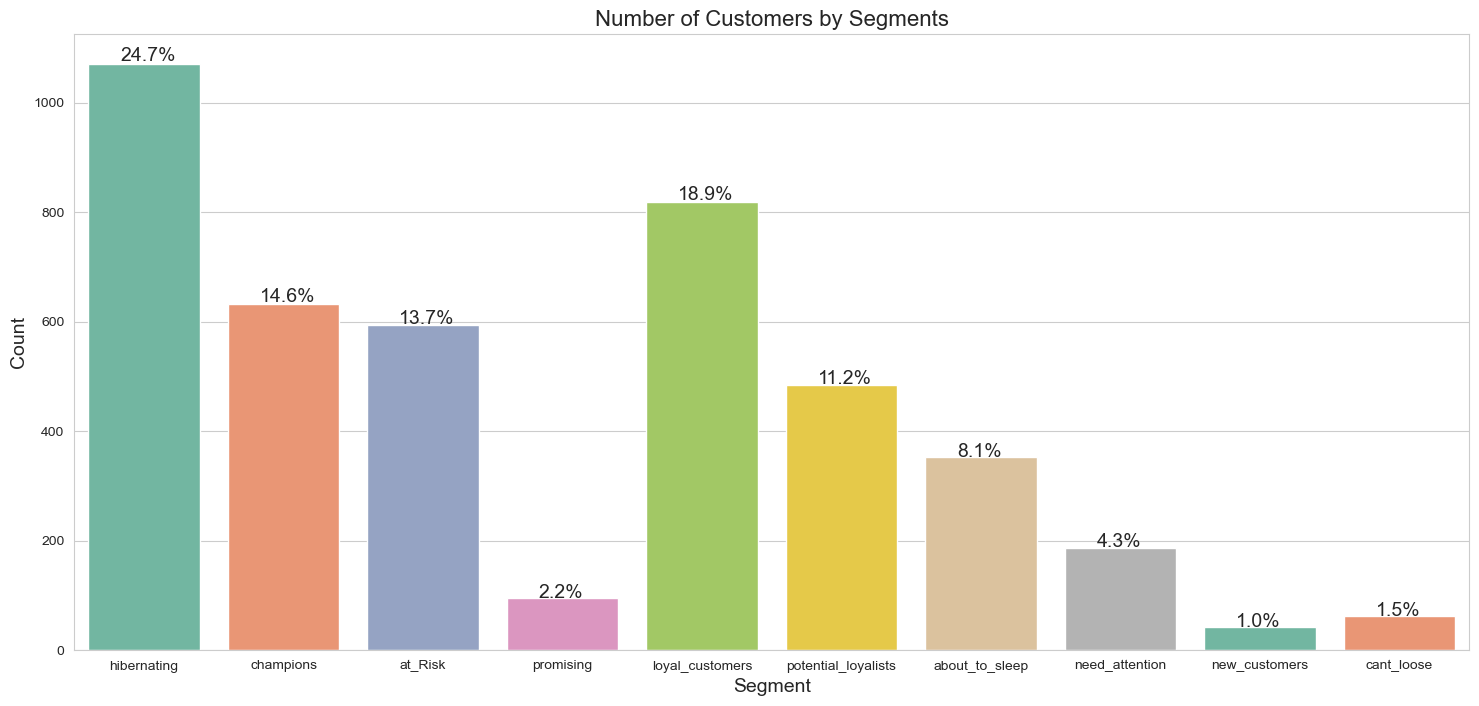

In [29]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

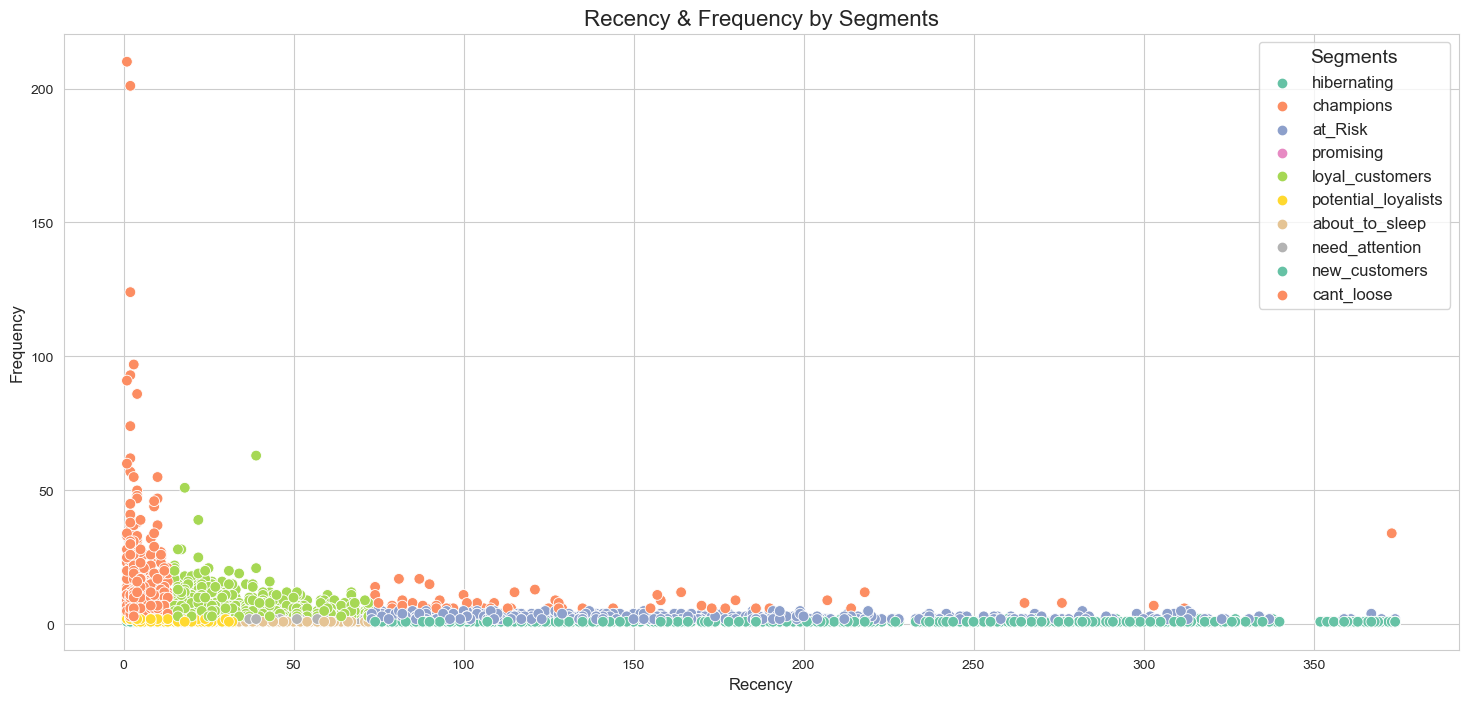

In [30]:
plt.figure(figsize = (18, 8))
sns.scatterplot(data = rfm, x = 'recency',
                y = 'frequency', hue ='segment', palette= palette, s = 60)
plt.title('Recency & Frequency by Segments', size = 16)
plt.xlabel('Recency', size = 12)
plt.ylabel('Frequency', size = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(loc = 'best', fontsize = 12,
           title = 'Segments',title_fontsize=14)
plt.show()

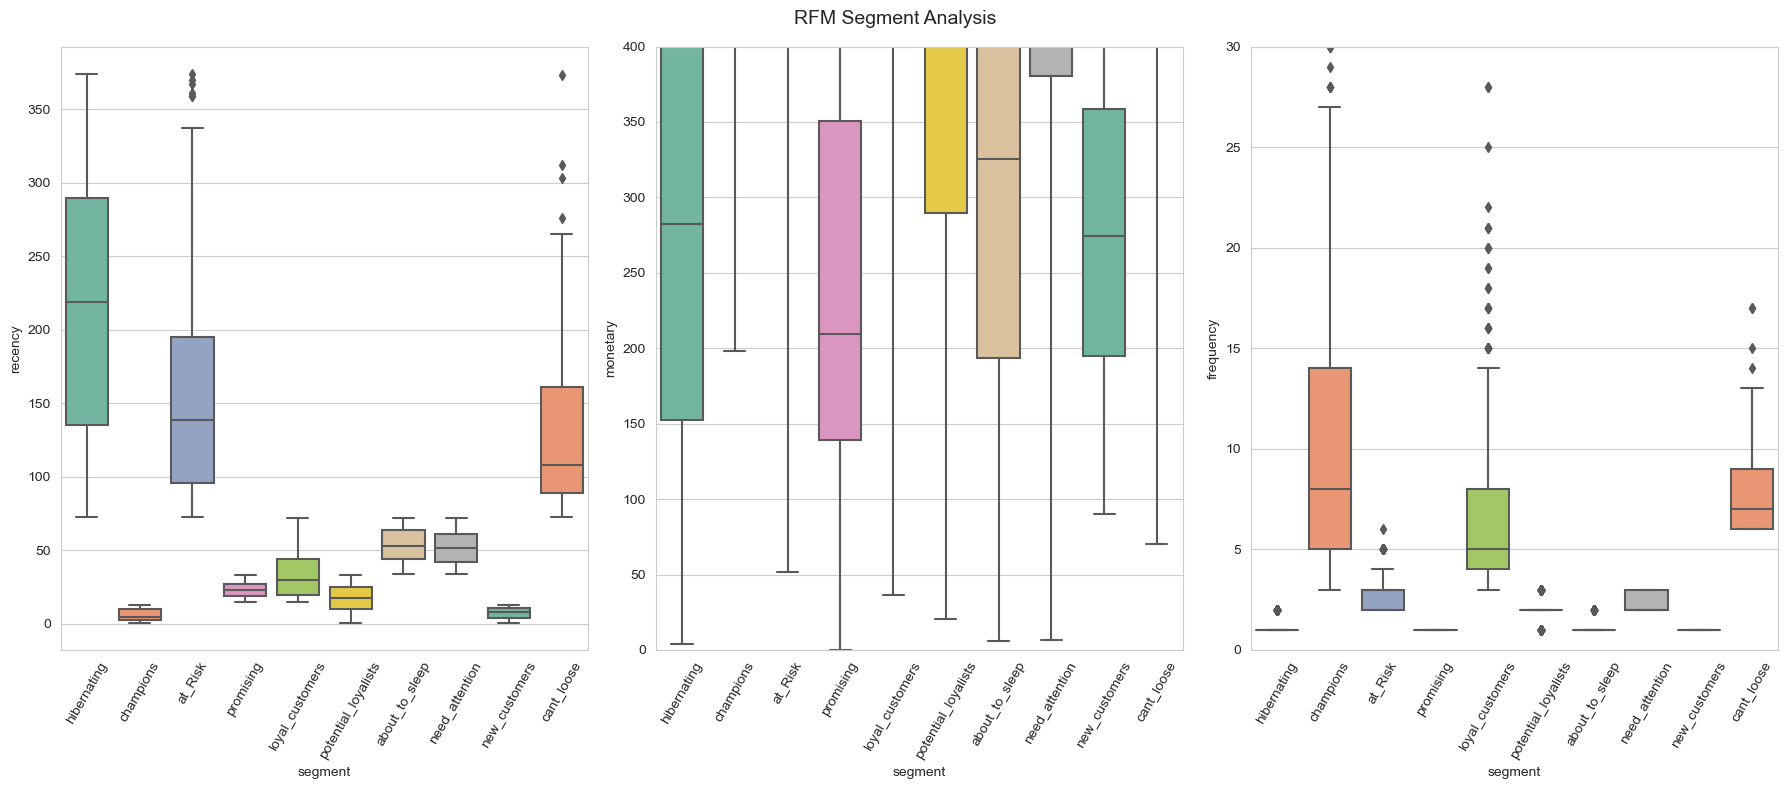

In [31]:
fig, axes = plt.subplots(1, 3, figsize = (18, 8))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.boxplot(ax = axes[idx], data = rfm,
                x = 'segment', y = feature_list[idx],
                palette= palette)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

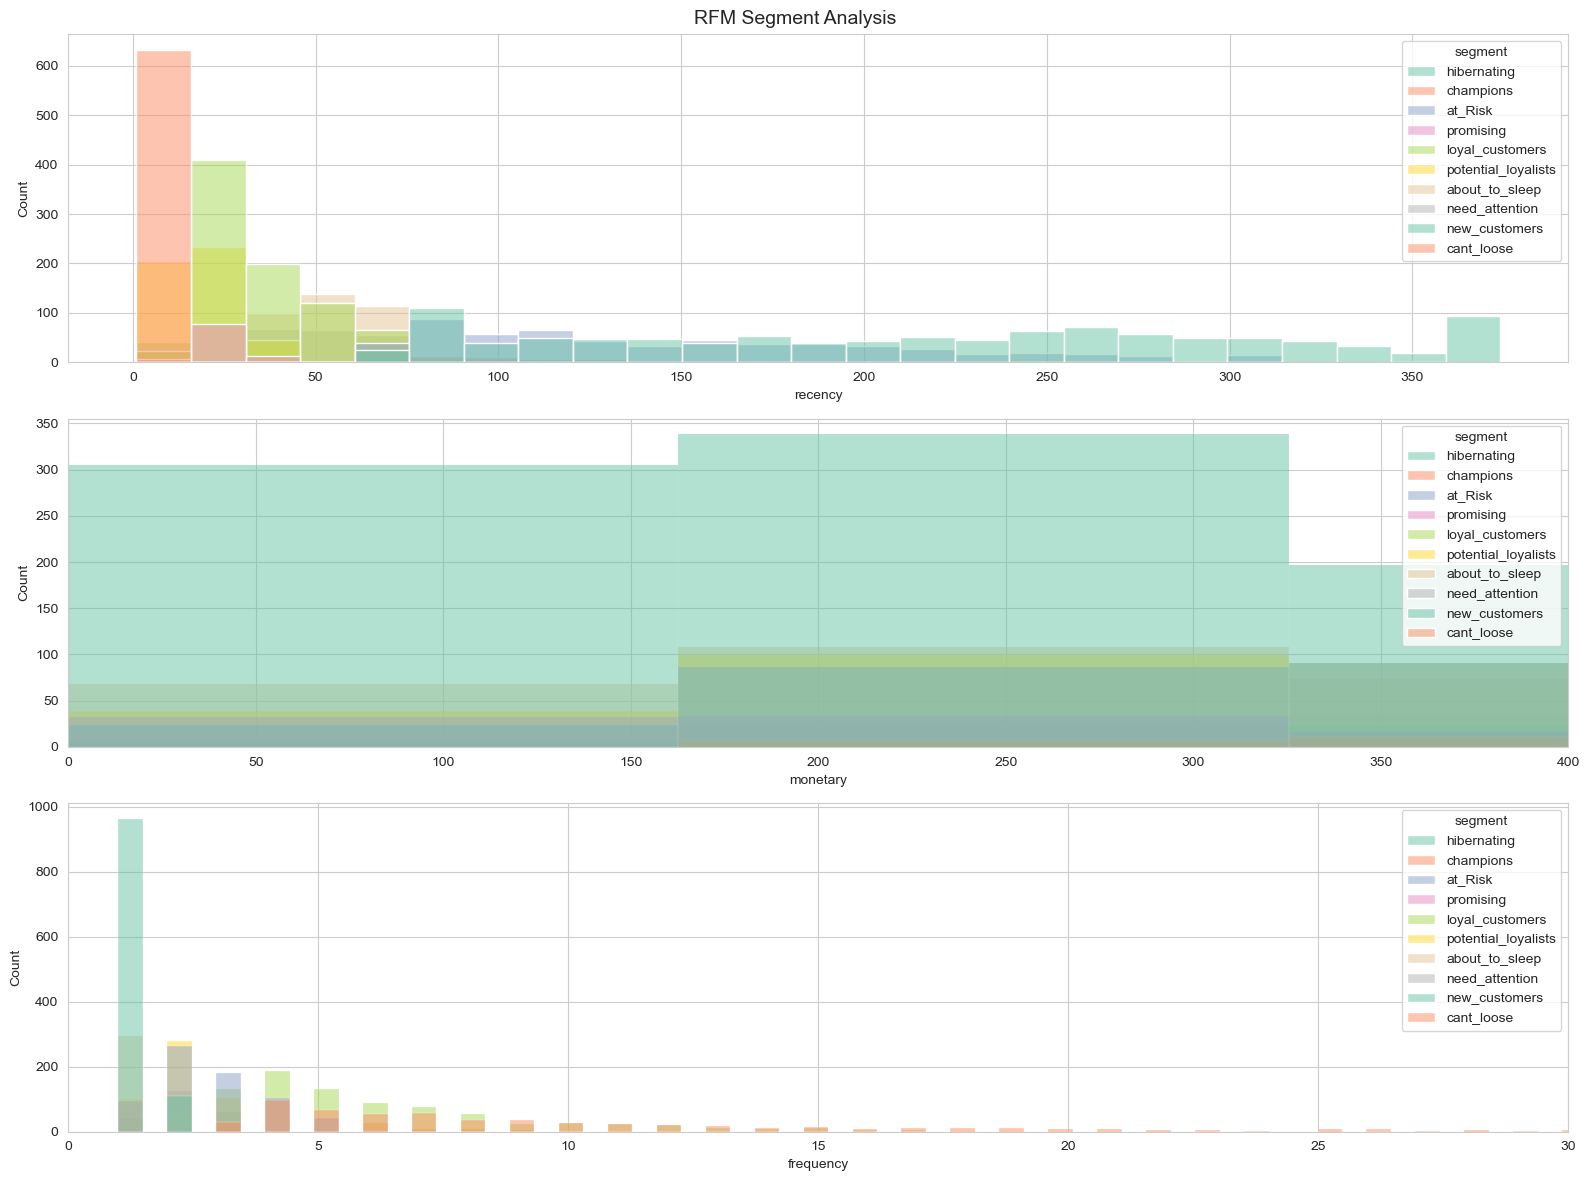

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()


# Cohort Analysis

코호트는 앱 가입 날짜, 첫 구매 월, 지리적 위치, 획득 채널(유기 사용자, 공연 마케팅 등) 등 공통점을 공유하는 사람들의 모임이다. 코호트 분석에서, 우리는 몇 가지 일반적인 패턴이나 행동을 식별하기 위해 이러한 사용자 그룹을 시간에 따라 추적한다.

In [33]:
def cohortAnalysis(dataframe):
    # 1. 데이터프레임을 카피합니다.
    data = dataframe.copy() 
    # 2. 고객아이디, 송장번호, 송장일자에서 중복을 제외한 데이터를 저장합니다.
    data = data[['CustomerID','InvoiceNo','InvoiceDate']].drop_duplicates() 
    # 3. 주문 월이라는 새 컬럼을 생성하고 송장 날짜에서 월만 추출한 데이터를 저장합니다.
    data['order_month'] = data['InvoiceDate'].dt.to_period('M')
    # 4. 코호트 컬럼을 만듭니다. 고객아이디로 그룹화 한 후 송장일자컬럼의 최저(처음 구매날짜)의 월을 추출
    data['cohort'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
    # 5. 고객 아이디의 유니크 값을 세그먼트로 분류한 그룹에서 뽑아냄
    cohort_data = data.groupby(['cohort','order_month']).agg(n_customers=('CustomerID','nunique')).reset_index(drop=False)
    # cohort_data = data.groupby('segment')['CustomerID'].count()

    # 6. 
    cohort_data['period_number'] = (cohort_data.order_month - cohort_data.cohort).apply(attrgetter('n'))

    # 7.
    cohort_pivot = cohort_data.pivot_table(
        index = 'cohort',
        columns = 'period_number',
        values = 'n_customers'
    )

    # 8. 
    cohort_size = cohort_pivot.iloc[:,0]

    # 9.
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

    # 10.
    with sns.axes_style('white'):
        fig, ax = plt.subplots(1, 2, figsize=(12,8),
        sharey=True,
        gridspec_kw ={ 'width_ratios':[1,11]})

        sns.heatmap(
            retention_matrix,
            mask = retention_matrix.isnull(),
            annot = True,
            cbar = False,
            fmt = '.0%',
            cmap = 'coolwarm',ax= ax[1]
        )

        ax[1].set_title('월별 코호트 : 유저 리텐션', fontsize=14)

        ax[1].set(
            xlabel='기간',
            ylabel=' '
        )

        white_cmap = mcolors.ListedColormap(['white'])
        
        sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0 : 'cohort_size'}),
            annot=True,
            c

        )


    

